# Recitation 0C: Introduction to PyTorch

PyTorch is an open-source deep learning framework
1. Provides building blocks to implement, train and test deep learning networks easily
1. Greater flexibility for research and prototyping as compared to other frameworks 
1. Facebook, Tesla, Microsoft, OpenAI, Nike, JP Morgan and Chase, ...

## Installation

1. Using pip: `pip3 install torch torchvision torchaudio`
1. Using conda: `conda install pytorch torchvision torchaudio -c pytorch`
1. Installing [previous versions](https://pytorch.org/get-started/previous-versions/) of PyTorch

## Building Blocks of a Neural Network

1. Dataset and DataLoader
1. Network Architecture
1. Model, Loss Function and Optimizer
1. Training Loop
1. Visualizing Results
1. Saving and Loading Checkpoints

## Appendix - PyTorch Tensors

1. Creating and Converting Tensors
1. Accessing and Modifying Tensors
1. Pivoting and Reshaping Tensors
1. Combining Tensors
1. Mathematical Operations on Tensors

Adapted from -
1. [PyTorch Tutorial](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html#Learning-by-example:-Continuous-XOR) by Phillip Lippe, UvA
1. PyTorch Tensor Fundamentals, F22 & S22 iteration of [CMU 11-785 Deep Learning](https://deeplearning.cs.cmu.edu)
1. [PyTorch Beginner Series](https://youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN) by Brad Heintz, PyTorch
1. PyTorch Official Tutorials and Documentation

In [1]:
!pip install torchsummaryX --quiet

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torchsummaryX import summary

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device:", device)
print("PyTorch version:", torch.__version__)

Device: cuda
PyTorch version: 1.13.0+cu116


## Building Blocks of a Neural Network

### Dataset and DataLoaders

PyTorch provides two data primitives: 
1. `torch.utils.data.Dataset` - stores the samples and their corresponding labels
1. `torch.utils.data.DataLoader` - wraps an iterable around the `Dataset` to enable easy access to the samples

In [ ]:
class XORDataset(torch.utils.data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

dataset = XORDataset(200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([ 1.0589, -0.2205]), tensor(1))


Note the use of `torch.randint` and `torch.randn` to create tensors initialized with random values. \\
Tensors are similar to NumPy’s ndarrays, except that -
1. Tensors can run on GPUs or other hardware accelerators
1. Tensors are optimized for automatic differentiation

In [ ]:
# A few more ways of creating tensors
t1 = torch.ones(size=(3,5))       # Tensors of ones of dimension 3x5
t2 = torch.zeros(size=(3,5))      # Tensors of zeros of dimension 3x5
t3 = torch.eye(3)                 # Identity matrix tensor of size 3
t4 = torch.rand(size=(3,5))       # Tensor of Uniformly distrubuted random numbers [0, 1) of size 3x5
t5 = torch.arange(7)              # A 1D tensor of integers [0, n-1]

print('t1', t1)
print('t2', t2)
print('t3', t3)
print('t4', t4)
print('t5', t5)

t1 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
t2 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
t3 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
t4 tensor([[0.9563, 0.6945, 0.2085, 0.0053, 0.9930],
        [0.9557, 0.6693, 0.4838, 0.4486, 0.8708],
        [0.1094, 0.2612, 0.5912, 0.4539, 0.4358]])
t5 tensor([0, 1, 2, 3, 4, 5, 6])


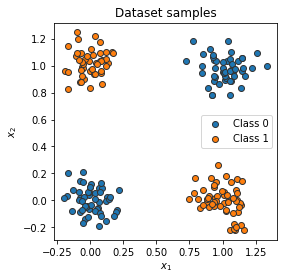

In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(dataset.data, dataset.label)
plt.show()

Note the conversion between PyTorch tensor and NumPy ndarray using `<tensor>.cpu().numpy()`

In [ ]:
# Convert tensor to numpy array
t1 = torch.tensor([1,2,3,4])
t2 = t1.detach().numpy() # We have to first detach computational graph (used for computing gradients) from tensors to convert to numpy

print('Tensor:', t1)
print('Numpy array:', t2)

# Convert from numpy to tensor
t3 = torch.from_numpy(t2)
print(t3)
print(type(t3), t3.dtype)

# Changing datatype of a tensor
print(t3.float(), t3.float().dtype)
print(t3.double())

Tensor: tensor([1, 2, 3, 4])
Numpy array: [1 2 3 4]
tensor([1, 2, 3, 4])
<class 'torch.Tensor'> torch.int64
tensor([1., 2., 3., 4.]) torch.float32
tensor([1., 2., 3., 4.], dtype=torch.float64)


In [ ]:
data_loader = torch.utils.data.DataLoader(
    dataset = dataset, # dataset from which to load the data.
    batch_size = 8, # how many samples per batch to load (default: 1).
    shuffle = True, # set to True to have the data reshuffled at every epoch (default: False).
    num_workers = 0, # how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)
    pin_memory = True, # If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them.
    drop_last = False # set to True to drop the last incomplete batch, if the dataset size is not divisible by the batch size. If False and the size of dataset is not divisible by the batch size, then the last batch will be smaller. (default: False)
    )

# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 1.0225,  0.1790],
        [ 1.0830, -0.1755],
        [ 1.0984, -0.0063],
        [ 0.0670, -0.0167],
        [ 0.9835, -0.0409],
        [ 0.0341,  1.2177],
        [ 0.8435,  1.0008],
        [ 0.9434,  0.0193]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 1, 1, 0, 1])


### Network Architecture

In [ ]:
class XORClassifier(torch.nn.Module):

    def __init__(self):
        super(XORClassifier, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(
                in_features   = 2     , # size of each input sample
                out_features  = 2     , # size of each output sample
                bias          = True  ), # If set to False, the layer will not learn an additive bias. Default: True
            torch.nn.Tanh(),
            torch.nn.Linear(2, 1)
        )

    def forward(self, x):
        out = self.model(x)
        return out

model = XORClassifier().to(device)

In [ ]:
print(model)

XORClassifier(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter model.0.weight, shape torch.Size([2, 2])
Parameter model.0.bias, shape torch.Size([2])
Parameter model.2.weight, shape torch.Size([1, 2])
Parameter model.2.bias, shape torch.Size([1])


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, {param}\n")

Parameter model.0.weight, Parameter containing:
tensor([[0.5202, 0.5724],
        [0.3927, 0.0529]], device='cuda:0', requires_grad=True)

Parameter model.0.bias, Parameter containing:
tensor([-0.0146, -0.0114], device='cuda:0', requires_grad=True)

Parameter model.2.weight, Parameter containing:
tensor([[-0.5816,  0.1192]], device='cuda:0', requires_grad=True)

Parameter model.2.bias, Parameter containing:
tensor([-0.6330], device='cuda:0', requires_grad=True)



In [ ]:
summary(model, data_inputs.to(device))

                 Kernel Shape Output Shape Params Mult-Adds
Layer                                                      
0_model.Linear_0       [2, 2]       [8, 2]    6.0       4.0
1_model.Tanh_1              -       [8, 2]      -         -
2_model.Linear_2       [2, 1]       [8, 1]    3.0       2.0
-------------------------------------------------------------
                      Totals
Total params             9.0
Trainable params         9.0
Non-trainable params     0.0
Mult-Adds                6.0


/usr/local/lib/python3.8/dist-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_model.Linear_0,"[2, 2]","[8, 2]",6.0,4.0
1_model.Tanh_1,-,"[8, 2]",NaN,NaN
2_model.Linear_2,"[2, 1]","[8, 1]",3.0,2.0


### Model, Loss Function and Optimizer

**Optimizers on GPU**

```
import torch.optim as optim

# WRONG APPROACH
model = MyModel()
optimizer = optim.SGD(model.parameters(), lr=0.001)
model.to(gpu_device) # NO LEARNING WILL HAPPEN!!
# ... start the training loop on GPU

# CORRECT APPROACH
model = MyModel()
model.to(gpu_device) # Parameters on correct device
optimizer = optim.SGD(model.parameters(), lr=0.001)
# ... start the training loop on GPU
```



In [ ]:
criterion = torch.nn.BCEWithLogitsLoss()
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_dataset = XORDataset(size=2500)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers = 0, pin_memory=True, drop_last = False)
val_dataset = XORDataset(size=500)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, drop_last=False)

See [this video](https://youtu.be/DPSXVJF5jIs) for a short visual explanation of binary cross entropy loss.

### Training Loop

In [ ]:
def train(model, optimizer, criterion, data_loader):
    # Set model to train mode
    model.train()
    train_loss = 0.0 #Monitoring Loss
    true_preds, num_preds = 0., 0.

    # Training loop
    for data_inputs, data_labels in data_loader:

        ## Step 1: Move input data to device (only strictly necessary if we use GPU)
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)

        ## Step 2: Run the model on the input data
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

        ## Step 3: Calculate the loss
        loss = criterion(preds, data_labels.float())
        train_loss += loss.item()

        ## Step 4: Perform backpropagation
        # Before calculating the gradients, we need to ensure that they are all zero.
        # The gradients would not be overwritten, but actually added to the existing ones.
        optimizer.zero_grad()
        # Perform backpropagation
        loss.backward()

        ## Step 5: Update the parameters
        optimizer.step()

        ## For accuracy calcualtions
        preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
        pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        true_preds += (pred_labels == data_labels).sum()
        num_preds += data_labels.shape[0]
    
    train_loss /= len(data_loader)
    acc = true_preds / num_preds
    return train_loss, acc.item()*100

Note the use of tensor squeeze which works similar to squeezing/unsqueezing numpy ndarrays.

In [ ]:
# With unsqueeze, you can add an extra dimension to a tensor. It will be helpful when you need an extra dimension as the 'batch size' in deep neural networks
t = torch.rand(size=(3,4,5))
print('Original tensor shape',t.shape)

# A new dimension is added while all the following dimension are incremented by 1 ( positionally)
ts = t.unsqueeze(dim=0)   # unsequeeze along axis 0
print('Unsequeeze along axis 0',ts.shape)
# Can apply this operation as many times as required
print('ts.unsqueeze(0).shape:',ts.unsqueeze(0).shape)

# Unsqueeze can also be applied to other intermediate dimensions
ts2 = t.unsqueeze(1)  # unsequeeze along axis 1
print('Unsequeeze along axis 1',ts2.shape)

Original tensor shape torch.Size([3, 4, 5])
Unsequeeze along axis 0 torch.Size([1, 3, 4, 5])
ts.unsqueeze(0).shape: torch.Size([1, 1, 3, 4, 5])
Unsequeeze along axis 1 torch.Size([3, 1, 4, 5])


In [ ]:
# Squeeze - Remove empty dimension(s) from tensor
print('ts.squeeze(0).shape:',ts.squeeze(0).shape)
print('ts2.squeeze(1).shape:',ts2.squeeze(1).shape)

# squeezing dimensions that have multiple elements have no impacts on the tensor

ts.squeeze(0).shape: torch.Size([3, 4, 5])
ts2.squeeze(1).shape: torch.Size([3, 4, 5])


In [ ]:
def eval(model, criterion, data_loader):
    model.eval() # Set model to eval mode
    val_loss = 0.0 #Monitoring Loss
    true_preds, num_preds = 0., 0.

    for data_inputs, data_labels in data_loader:

        # Determine prediction of model on dev set
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
        with torch.inference_mode():
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
        
        loss = criterion(preds, data_labels.float())
        val_loss += loss.item()
        
        preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
        pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        true_preds += (pred_labels == data_labels).sum()
        num_preds += data_labels.shape[0]

    val_loss /= len(data_loader)
    acc = true_preds / num_preds
    #print(f"Accuracy of the model: {100.0*acc:4.2f}%")
    return val_loss, acc.item()*100

In [ ]:
# Iterate over number of epochs to train and evaluate your model
torch.cuda.empty_cache()

max_epoch = 100
train_loss = [None] * max_epoch
train_acc = [None] * max_epoch
val_loss = [None] * max_epoch
val_acc = [None] * max_epoch

for epoch in range(max_epoch):
    train_loss[epoch], train_acc[epoch] = train(model, optimizer, criterion, train_loader)
    val_loss[epoch], val_acc[epoch] = eval(model, criterion, val_loader)

### Visualizing Results

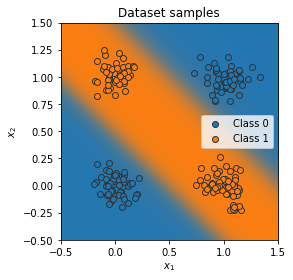

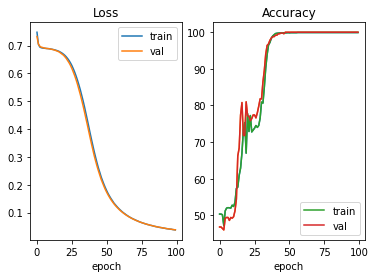

In [ ]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(mcolors.to_rgba("C0")).to(device)
    c1 = torch.Tensor(mcolors.to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()
print()

plt.subplot(1, 2, 1)
epoch = range(max_epoch)
plt.plot(epoch, train_loss, label='train')
plt.plot(epoch, val_loss, label='val')
plt.legend()
plt.title("Loss")
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, train_acc, val_acc)
plt.plot(epoch, train_acc, label='train')
plt.plot(epoch, val_acc, label='val')
plt.legend()
plt.title("Accuracy")
plt.xlabel('epoch')
plt.show()

### Saving and Loading Checkpoints

In [ ]:
 print(model.state_dict())

OrderedDict([('model.0.weight', tensor([[2.4519, 2.4463],
        [3.2282, 3.1857]], device='cuda:0')), ('model.0.bias', tensor([-3.5690, -1.5763], device='cuda:0')), ('model.2.weight', tensor([[-4.5068,  4.4000]], device='cuda:0')), ('model.2.bias', tensor([-3.7990], device='cuda:0'))])


In [ ]:
# Saving and Loading Model Checkpoint
# torch.save(object, filename). For the filename, any extension can be used
torch.save(model.state_dict(), "our_model.pth")

# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.pth")

# Create a new model and load the state
new_model = XORClassifier()
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('model.0.weight', tensor([[2.4519, 2.4463],
        [3.2282, 3.1857]], device='cuda:0')), ('model.0.bias', tensor([-3.5690, -1.5763], device='cuda:0')), ('model.2.weight', tensor([[-4.5068,  4.4000]], device='cuda:0')), ('model.2.bias', tensor([-3.7990], device='cuda:0'))])

Loaded model
 OrderedDict([('model.0.weight', tensor([[2.4519, 2.4463],
        [3.2282, 3.1857]])), ('model.0.bias', tensor([-3.5690, -1.5763])), ('model.2.weight', tensor([[-4.5068,  4.4000]])), ('model.2.bias', tensor([-3.7990]))])


In [ ]:
torch.save({'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            #'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'val_acc': val_acc}, 
          './model_checkpoint.pth')

In [ ]:
# For Google Colab users
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
torch.save({'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            #'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'val_acc': val_acc}, 
          '/content/drive/MyDrive/Colab Notebooks/model_checkpoint.pth')

## Appendix - PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

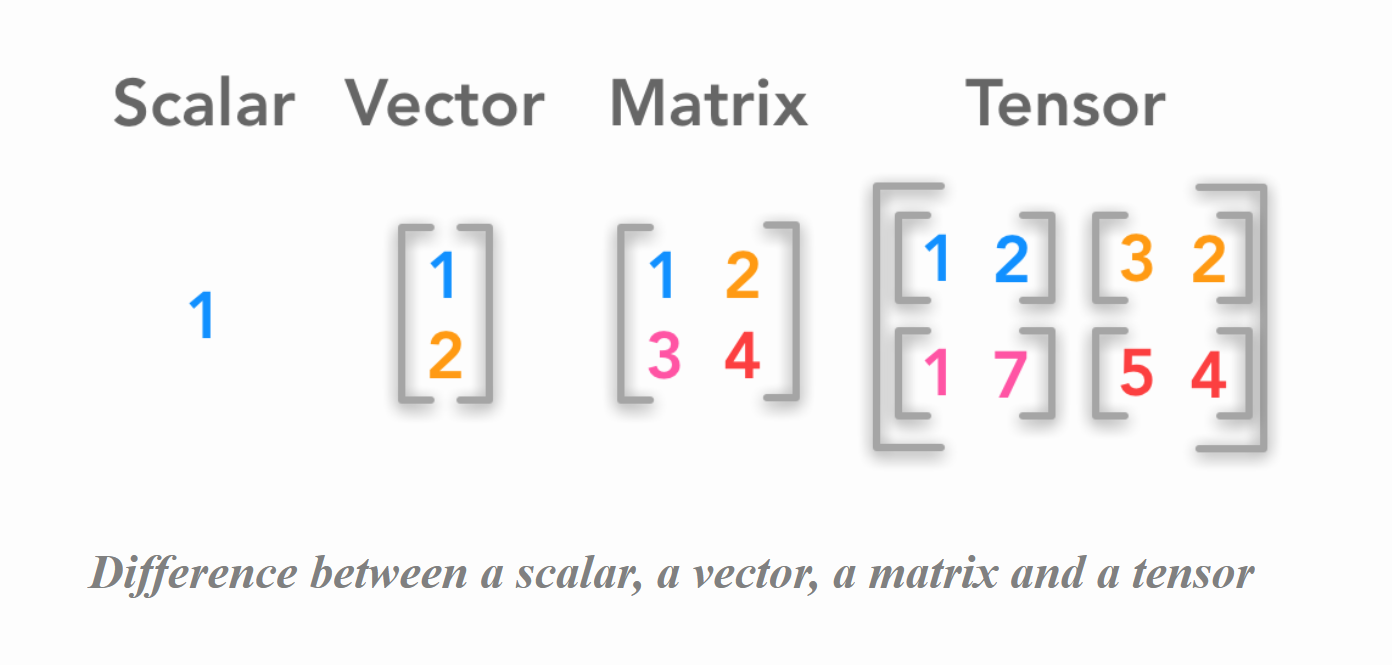
[Source](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/)

Tensors are similar to Numpy’s ndarrays, but the biggest difference is that tensors can run on GPUs (Graphics Processing Unit) or other hardware accelerators. You can parallelize tensor computation, which reduces the run time.

### Creating and Converting Tensors

In [ ]:
t1 = torch.ones(size=(5,3))       # Tensors of ones of dimension 5x3
t2 = torch.zeros(size=(5,3))      # Tensors of zeros of dimension 5x3
t3 = torch.eye(3)                 # Identity matrix tensor of size 3
t4 = torch.rand(size=(3,4))       # Tensor of Uniformly distrubuted random numbers [0, 1) of size 3x4
t5 = torch.arange(7)              # A 1D tensor of integers [0, n-1]

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[0.6987, 0.2530, 0.2575, 0.5564],
        [0.9058, 0.5009, 0.6244, 0.7164],
        [0.1264, 0.2430, 0.4711, 0.3050]])
tensor([0, 1, 2, 3, 4, 5, 6])


In [ ]:
t1 = torch.tensor([1,2,3,4])                # from python list
t2 = torch.tensor(np.array([1,2,3,4]))      # from numpy array
t3 = torch.tensor(np.random.randn(3))       # from numpy array
t4 = t3.clone()                             # copy from existing torch tensor

print(t1)
print(t2)
print(t3)
print(t4)

tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4])
tensor([-0.4680,  0.1753, -0.6912], dtype=torch.float64)
tensor([-0.4680,  0.1753, -0.6912], dtype=torch.float64)


In [ ]:
# Create a numpy array
arr = np.array([10, 20, 30, 40, 50])
print(arr)
print(type(arr), arr.dtype)
print("=======================================")

# Convert from numpy to tensor
tensor = torch.from_numpy(arr)
print(tensor)
print(type(tensor), tensor.dtype)
print("=======================================")

# Changing datatype of a tensor
print(tensor.float(), tensor.float().dtype)
print(tensor.double())
print("=======================================")

# in case we have the data pushed on to the cuda, use torch.cuda.DoubleTensor()

[10 20 30 40 50]
<class 'numpy.ndarray'> int64
tensor([10, 20, 30, 40, 50])
<class 'torch.Tensor'> torch.int64
tensor([10., 20., 30., 40., 50.]) torch.float32
tensor([10., 20., 30., 40., 50.], dtype=torch.float64)


In [ ]:
# Convert tensor to numpy array
t1 = torch.tensor([1,2,3,4])
t2 = t1.detach().numpy() # We have to first detach computational graph (used for computing gradients) from tensors to convert to numpy

print('Tensor:', t1)
print('Numpy array:', t2)

Tensor: tensor([1, 2, 3, 4])
Numpy array: [1 2 3 4]


For more information, 
1. [Read the PyTorch documentation on Tensors](https://pytorch.org/docs/stable/tensors.html)
1. [A stackoverflow post on detach and computational graph](https://stackoverflow.com/questions/63582590/why-do-we-call-detach-before-calling-numpy-on-a-pytorch-tensor)

Before we deal with the data in any way, if it is pushed on to the device, which, in most cases, is going to be the GPU, helps in the execution speed significantly as it saves the time needed to fetch the data from the server to the GPU repetitively.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Pushing the data to device
tensor = tensor.to(device)

# in case we have the data pushed on to the cuda, use tensor.cuda.DoubleTensor for the tensor conversion/casting

cuda


### Accessing and Modifying Tensors
**NOTE:** Tensor values can easily be modified by using the accessing method, similar to numpy to select the desired section of the tensor to be modified

In [ ]:
# Basic 
t = torch.rand(size=(3,4,5)) # 3D tensor

print('Original Tensor t:')
print(t)
print('\n')

# Some valid ways of accessing individual elements in the tensor
print('t[0][0][0]\n', t[0][0][0])
print('t[1,2,3]\n', t[1,2,3])
print('t[-1,-1][-1]\n', t[-1,-1][-1])

Original Tensor t:
tensor([[[0.0253, 0.5890, 0.9354, 0.0043, 0.4231],
         [0.5503, 0.0732, 0.7318, 0.9306, 0.3960],
         [0.6964, 0.1878, 0.7759, 0.6302, 0.4724],
         [0.9624, 0.9936, 0.5599, 0.7752, 0.6373]],

        [[0.6778, 0.1116, 0.0814, 0.5313, 0.2059],
         [0.3911, 0.5944, 0.8498, 0.5151, 0.6121],
         [0.7672, 0.0819, 0.8967, 0.4331, 0.4286],
         [0.8459, 0.2692, 0.0281, 0.6322, 0.8540]],

        [[0.6945, 0.1053, 0.3875, 0.5227, 0.3165],
         [0.9656, 0.4876, 0.7642, 0.7463, 0.8254],
         [0.2451, 0.4158, 0.6477, 0.5719, 0.2672],
         [0.8024, 0.2236, 0.3165, 0.5075, 0.8159]]])


t[0][0][0]
 tensor(0.0253)
t[1,2,3]
 tensor(0.4331)
t[-1,-1][-1]
 tensor(0.8159)


In [ ]:
print('Original Tensor t:')
print(t)
print('\n')

print('t[0]\n', t[0])
print('t[:1]\n', t[:1])
print('t[:,1]\n', t[:,1])
print('t[:,:,3]\n', t[:,:,3])
print('t[:,:,-2:]\n', t[:,:,-2:])

Original Tensor t:
tensor([[[0.0253, 0.5890, 0.9354, 0.0043, 0.4231],
         [0.5503, 0.0732, 0.7318, 0.9306, 0.3960],
         [0.6964, 0.1878, 0.7759, 0.6302, 0.4724],
         [0.9624, 0.9936, 0.5599, 0.7752, 0.6373]],

        [[0.6778, 0.1116, 0.0814, 0.5313, 0.2059],
         [0.3911, 0.5944, 0.8498, 0.5151, 0.6121],
         [0.7672, 0.0819, 0.8967, 0.4331, 0.4286],
         [0.8459, 0.2692, 0.0281, 0.6322, 0.8540]],

        [[0.6945, 0.1053, 0.3875, 0.5227, 0.3165],
         [0.9656, 0.4876, 0.7642, 0.7463, 0.8254],
         [0.2451, 0.4158, 0.6477, 0.5719, 0.2672],
         [0.8024, 0.2236, 0.3165, 0.5075, 0.8159]]])


t[0]
 tensor([[0.0253, 0.5890, 0.9354, 0.0043, 0.4231],
        [0.5503, 0.0732, 0.7318, 0.9306, 0.3960],
        [0.6964, 0.1878, 0.7759, 0.6302, 0.4724],
        [0.9624, 0.9936, 0.5599, 0.7752, 0.6373]])
t[:1]
 tensor([[[0.0253, 0.5890, 0.9354, 0.0043, 0.4231],
         [0.5503, 0.0732, 0.7318, 0.9306, 0.3960],
         [0.6964, 0.1878, 0.7759, 0.6302, 0.4

### Pivoting and Reshaping Tensors
In the following section we cover common methods used to pivot and reshape tensors, namely:
1. Flatten
1. Unsqueeze
1. Squeeze
1. Reshape
1. View
1. Transpose
1. Permute

In [ ]:
# Flatten: Changing a multi-dimensional tensors to a single dimension
t = torch.rand(size=(3,4,5)) # 3D tensor
print(t) 
print(t.shape)               # 3x4x5
print(t.flatten())
print(t.flatten().shape)     # 60

tensor([[[0.0240, 0.5068, 0.9617, 0.2255, 0.4129],
         [0.3944, 0.8462, 0.2067, 0.3948, 0.7140],
         [0.8401, 0.8569, 0.6208, 0.2175, 0.6388],
         [0.8225, 0.4588, 0.2635, 0.9862, 0.9136]],

        [[0.8368, 0.0109, 0.7114, 0.1192, 0.6436],
         [0.3420, 0.8239, 0.0367, 0.7645, 0.8582],
         [0.8747, 0.4098, 0.6192, 0.9991, 0.0204],
         [0.8846, 0.9477, 0.1628, 0.0848, 0.8055]],

        [[0.0375, 0.5881, 0.3264, 0.1201, 0.5628],
         [0.6711, 0.3571, 0.9250, 0.3746, 0.2408],
         [0.5941, 0.2101, 0.1154, 0.0972, 0.1073],
         [0.4087, 0.9781, 0.5222, 0.7243, 0.2212]]])
torch.Size([3, 4, 5])
tensor([0.0240, 0.5068, 0.9617, 0.2255, 0.4129, 0.3944, 0.8462, 0.2067, 0.3948,
        0.7140, 0.8401, 0.8569, 0.6208, 0.2175, 0.6388, 0.8225, 0.4588, 0.2635,
        0.9862, 0.9136, 0.8368, 0.0109, 0.7114, 0.1192, 0.6436, 0.3420, 0.8239,
        0.0367, 0.7645, 0.8582, 0.8747, 0.4098, 0.6192, 0.9991, 0.0204, 0.8846,
        0.9477, 0.1628, 0.0848, 0.8055, 

In [ ]:
# With unsqueeze, you can add an extra dimension to a tensor. It will be helpful when you need an extra dimension as the 'batch size' in deep neural networks
t = torch.rand(size=(3,4,5))
ts = t.unsqueeze(dim=0)   # unsequeeze along axis 0
ts2 = t.unsqueeze(1)  # unsequeeze along axis 1

print(ts) # A new dimension is added while all the following dimension are incremented by 1 ( positionally)
print('Original tensor shape',t.shape)
print('Unsequeeze along axis 0',ts.shape)
print('\n')

print(ts.unsqueeze(0)) # Can apply this operation as many times as required
print('ts.unsqueeze(0).shape:',ts.unsqueeze(0).shape)
print('\n')

print(ts2) # Unsqueeze can also be applied to other intermediate dimensions
print('Unsequeeze along axis 1',ts2.shape)
print('\n')

tensor([[[[5.9372e-01, 2.2969e-01, 1.0819e-01, 2.4457e-01, 5.7491e-01],
          [1.3272e-01, 9.9619e-02, 1.0662e-01, 7.9600e-01, 3.6011e-01],
          [4.2527e-01, 6.1067e-01, 3.4556e-01, 7.5479e-01, 4.9912e-01],
          [8.3632e-01, 5.0993e-01, 3.3440e-01, 3.3775e-01, 7.3744e-02]],

         [[3.0355e-01, 4.9316e-01, 1.5615e-02, 5.8470e-02, 1.3417e-04],
          [9.0861e-01, 8.9748e-01, 6.4199e-01, 8.4938e-02, 9.2054e-02],
          [6.5038e-01, 9.1850e-01, 1.9187e-02, 3.6044e-01, 9.7162e-02],
          [3.0784e-01, 3.0505e-02, 4.8163e-01, 8.8730e-01, 3.5697e-01]],

         [[5.3561e-01, 3.2086e-01, 2.8293e-01, 3.0506e-01, 6.0609e-01],
          [8.3256e-01, 7.9254e-01, 3.9902e-01, 8.9389e-01, 3.8810e-01],
          [4.3436e-01, 8.5071e-01, 9.9202e-01, 5.9834e-01, 3.7562e-01],
          [4.4187e-01, 3.4381e-03, 1.4404e-01, 4.6253e-02, 6.3226e-01]]]])
Original tensor shape torch.Size([3, 4, 5])
Unsequeeze along axis 0 torch.Size([1, 3, 4, 5])


tensor([[[[[5.9372e-01, 2.2969e-01

In [ ]:
# Squeeze - Remove empty dimension(s) from tensor
print(ts.squeeze(0))
print('ts.squeeze(0).shape:',ts.squeeze(0).shape)
print('\n')

print(ts2.squeeze(1))
print('ts2.squeeze(1).shape:',ts2.squeeze(1).shape)
print('\n')

# print(t.squeeze(0)) squeezing dimensions that have multiple elements have no impacts on the tensor
# print(ts.squeeze(1)) squeezing dimensions that have multiple elements have no impacts on the tensor

tensor([[[5.9372e-01, 2.2969e-01, 1.0819e-01, 2.4457e-01, 5.7491e-01],
         [1.3272e-01, 9.9619e-02, 1.0662e-01, 7.9600e-01, 3.6011e-01],
         [4.2527e-01, 6.1067e-01, 3.4556e-01, 7.5479e-01, 4.9912e-01],
         [8.3632e-01, 5.0993e-01, 3.3440e-01, 3.3775e-01, 7.3744e-02]],

        [[3.0355e-01, 4.9316e-01, 1.5615e-02, 5.8470e-02, 1.3417e-04],
         [9.0861e-01, 8.9748e-01, 6.4199e-01, 8.4938e-02, 9.2054e-02],
         [6.5038e-01, 9.1850e-01, 1.9187e-02, 3.6044e-01, 9.7162e-02],
         [3.0784e-01, 3.0505e-02, 4.8163e-01, 8.8730e-01, 3.5697e-01]],

        [[5.3561e-01, 3.2086e-01, 2.8293e-01, 3.0506e-01, 6.0609e-01],
         [8.3256e-01, 7.9254e-01, 3.9902e-01, 8.9389e-01, 3.8810e-01],
         [4.3436e-01, 8.5071e-01, 9.9202e-01, 5.9834e-01, 3.7562e-01],
         [4.4187e-01, 3.4381e-03, 1.4404e-01, 4.6253e-02, 6.3226e-01]]])
ts.squeeze(0).shape: torch.Size([3, 4, 5])


tensor([[[5.9372e-01, 2.2969e-01, 1.0819e-01, 2.4457e-01, 5.7491e-01],
         [1.3272e-01, 9.96

In [ ]:
# Reshape - Change the shape of a tensor
print('Orginal tensor shape: ', t.shape)
print(t.reshape((12,5)), t.reshape((12,5)).shape)
print(t.reshape(12,-1), t.reshape(12,-1).shape) # Can use -1 to specify one of the dimensions which is automatically inferred based on the elements in other dimensions
print(t.reshape(5,4,3), t.reshape(5,4,3).shape)
print(t.reshape(-1), t.reshape(-1).shape)

# # Note:
# print(t.reshape(12,6)) This command won't work as the number of elements need to be consistent with the source tensor

Orginal tensor shape:  torch.Size([3, 4, 5])
tensor([[5.9372e-01, 2.2969e-01, 1.0819e-01, 2.4457e-01, 5.7491e-01],
        [1.3272e-01, 9.9619e-02, 1.0662e-01, 7.9600e-01, 3.6011e-01],
        [4.2527e-01, 6.1067e-01, 3.4556e-01, 7.5479e-01, 4.9912e-01],
        [8.3632e-01, 5.0993e-01, 3.3440e-01, 3.3775e-01, 7.3744e-02],
        [3.0355e-01, 4.9316e-01, 1.5615e-02, 5.8470e-02, 1.3417e-04],
        [9.0861e-01, 8.9748e-01, 6.4199e-01, 8.4938e-02, 9.2054e-02],
        [6.5038e-01, 9.1850e-01, 1.9187e-02, 3.6044e-01, 9.7162e-02],
        [3.0784e-01, 3.0505e-02, 4.8163e-01, 8.8730e-01, 3.5697e-01],
        [5.3561e-01, 3.2086e-01, 2.8293e-01, 3.0506e-01, 6.0609e-01],
        [8.3256e-01, 7.9254e-01, 3.9902e-01, 8.9389e-01, 3.8810e-01],
        [4.3436e-01, 8.5071e-01, 9.9202e-01, 5.9834e-01, 3.7562e-01],
        [4.4187e-01, 3.4381e-03, 1.4404e-01, 4.6253e-02, 6.3226e-01]]) torch.Size([12, 5])
tensor([[5.9372e-01, 2.2969e-01, 1.0819e-01, 2.4457e-01, 5.7491e-01],
        [1.3272e-01, 9.9

View works exactly like reshape but may not work in all cases. Please refer to the link below to see how view and reshape are different. <br>
View vs Reshape:
https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch

In [ ]:
# Transpose - This operation is primarily a generalization of the regular matrix transpose
t = torch.tensor([[[1,2,3,4], [5,6,7,8], [9,10,11,12]],
                  [[-1,-2,-3,-4], [-5,-6,-7,-8], [-9,-10,-11,-12]]])

print(t.shape)
print(t)
print('\n')

print(t.transpose(0,1).shape)
print(t.transpose(0,1))
print('\n')

print(t.transpose(0,2).shape)
print(t.transpose(0,2))
print('\n')

torch.Size([2, 3, 4])
tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8],
         [  9,  10,  11,  12]],

        [[ -1,  -2,  -3,  -4],
         [ -5,  -6,  -7,  -8],
         [ -9, -10, -11, -12]]])


torch.Size([3, 2, 4])
tensor([[[  1,   2,   3,   4],
         [ -1,  -2,  -3,  -4]],

        [[  5,   6,   7,   8],
         [ -5,  -6,  -7,  -8]],

        [[  9,  10,  11,  12],
         [ -9, -10, -11, -12]]])


torch.Size([4, 3, 2])
tensor([[[  1,  -1],
         [  5,  -5],
         [  9,  -9]],

        [[  2,  -2],
         [  6,  -6],
         [ 10, -10]],

        [[  3,  -3],
         [  7,  -7],
         [ 11, -11]],

        [[  4,  -4],
         [  8,  -8],
         [ 12, -12]]])




In [ ]:
# Permute - This operation allows the user to simultaneously reorder multiple dimensions unlike transpose which interchanges two dimensions only
t = torch.tensor([[[1,2,3,4], [5,6,7,8], [9,10,11,12]],
                  [[-1,-2,-3,-4], [-5,-6,-7,-8], [-9,-10,-11,-12]]])

print(t.shape)
print(t)
print('\n')

print(t.permute(1,0,2).shape)
print(t.permute(1,0,2))
print('\n')

print(t.permute(1,2,0).shape)
print(t.permute(1,2,0))
print('\n')

torch.Size([2, 3, 4])
tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8],
         [  9,  10,  11,  12]],

        [[ -1,  -2,  -3,  -4],
         [ -5,  -6,  -7,  -8],
         [ -9, -10, -11, -12]]])


torch.Size([3, 2, 4])
tensor([[[  1,   2,   3,   4],
         [ -1,  -2,  -3,  -4]],

        [[  5,   6,   7,   8],
         [ -5,  -6,  -7,  -8]],

        [[  9,  10,  11,  12],
         [ -9, -10, -11, -12]]])


torch.Size([3, 4, 2])
tensor([[[  1,  -1],
         [  2,  -2],
         [  3,  -3],
         [  4,  -4]],

        [[  5,  -5],
         [  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11],
         [ 12, -12]]])




### Combining Tensors
1. Concatenate
2. Stack
3. Padding

In [ ]:
# Concatenating Tensors
t1 = torch.rand(size=(2,3,4))
t2 = torch.rand(size=(2,3,4))

print('t1:\n', t1, "\n")
print('t2:\n', t2, "\n")

print('CONCATENATING TENSORS\n')

print('Concatenating two tensors along axis 1')
print(torch.cat([t1,t2],dim=1))
print('New Shape: ', torch.cat([t1,t2],dim=1).shape)

t1:
 tensor([[[0.9677, 0.8011, 0.3440, 0.1881],
         [0.9801, 0.8740, 0.0679, 0.3512],
         [0.6089, 0.4464, 0.3894, 0.8961]],

        [[0.5917, 0.5534, 0.8827, 0.5103],
         [0.4989, 0.6197, 0.8686, 0.5189],
         [0.2094, 0.1717, 0.5607, 0.2649]]]) 

t2:
 tensor([[[4.6969e-01, 5.0538e-01, 6.9598e-01, 6.0841e-01],
         [8.7373e-02, 5.3769e-01, 1.5377e-01, 6.7489e-01],
         [4.8977e-01, 7.6118e-01, 4.7135e-01, 2.3073e-01]],

        [[8.9391e-01, 2.4734e-02, 8.4410e-01, 4.6826e-01],
         [8.5716e-01, 3.5310e-04, 1.7382e-01, 8.5265e-01],
         [8.4496e-01, 9.5245e-01, 9.7457e-01, 9.4346e-01]]]) 

CONCATENATING TENSORS

Concatenating two tensors along axis 1
tensor([[[9.6768e-01, 8.0109e-01, 3.4398e-01, 1.8808e-01],
         [9.8014e-01, 8.7399e-01, 6.7863e-02, 3.5119e-01],
         [6.0891e-01, 4.4641e-01, 3.8937e-01, 8.9610e-01],
         [4.6969e-01, 5.0538e-01, 6.9598e-01, 6.0841e-01],
         [8.7373e-02, 5.3769e-01, 1.5377e-01, 6.7489e-01],
         

In [ ]:
# t1 shape (2,3,4)
# t2 shape (2,3,4)

t3 = torch.rand(size=(1,3,4))
t4 = torch.rand(size=(2,3,1))

print('t3:\n', t3, "\n")
print('t4:\n', t4, "\n")

print('\nConcatenating three tensors along axis 0')
print(torch.cat([t1,t2,t3],dim=0))
print('New Shape: ', torch.cat([t1,t2,t3],dim=0).shape)

print('\nConcatenating three tensors along axis 2')
print(torch.cat([t1,t2,t4],dim=2))
print('New Shape: ', torch.cat([t1,t2,t4],dim=2).shape)

t3:
 tensor([[[0.3106, 0.8724, 0.5231, 0.9471],
         [0.9672, 0.3576, 0.3821, 0.8030],
         [0.2354, 0.0458, 0.9252, 0.9160]]]) 

t4:
 tensor([[[0.5219],
         [0.4568],
         [0.1350]],

        [[0.4945],
         [0.7768],
         [0.8310]]]) 


Concatenating three tensors along axis 0
tensor([[[9.6768e-01, 8.0109e-01, 3.4398e-01, 1.8808e-01],
         [9.8014e-01, 8.7399e-01, 6.7863e-02, 3.5119e-01],
         [6.0891e-01, 4.4641e-01, 3.8937e-01, 8.9610e-01]],

        [[5.9166e-01, 5.5337e-01, 8.8274e-01, 5.1031e-01],
         [4.9886e-01, 6.1973e-01, 8.6858e-01, 5.1892e-01],
         [2.0938e-01, 1.7172e-01, 5.6065e-01, 2.6486e-01]],

        [[4.6969e-01, 5.0538e-01, 6.9598e-01, 6.0841e-01],
         [8.7373e-02, 5.3769e-01, 1.5377e-01, 6.7489e-01],
         [4.8977e-01, 7.6118e-01, 4.7135e-01, 2.3073e-01]],

        [[8.9391e-01, 2.4734e-02, 8.4410e-01, 4.6826e-01],
         [8.5716e-01, 3.5310e-04, 1.7382e-01, 8.5265e-01],
         [8.4496e-01, 9.5245e-01, 9.7457

In [ ]:
# Stack - This operation can be imagined as a combination of unsqueeze and cat.
t1 = torch.rand(size=(3,4)) 
t2 = torch.rand(size=(3,4))

print(t1.shape)
print(t1)
print('\n')

print(t2.shape)
print(t2)
print('\n')


print(torch.stack([t1,t2],dim=0)) #(3, 4) --> (1, 3, 4) --> (N, 3, 4)
print("New Shape:", torch.stack([t1,t2],dim=0).shape, '\n')

print(torch.stack([t1,t2],dim=1)) #(3, 4) --> (3, 1, 4) --> (3, N, 4)
print("New Shape:", torch.stack([t1,t2],dim=1).shape, '\n')

print(torch.stack([t1,t2],dim=2)) #(3, 4) --> (3, 4, 1) --> (3, 4, N)
print("New Shape:", torch.stack([t1,t2],dim=2).shape, '\n')

torch.Size([3, 4])
tensor([[0.1447, 0.1911, 0.7041, 0.4711],
        [0.9392, 0.9979, 0.1503, 0.9181],
        [0.1165, 0.3784, 0.1240, 0.9323]])


torch.Size([3, 4])
tensor([[0.0441, 0.9888, 0.7877, 0.2608],
        [0.8887, 0.0429, 0.2316, 0.2792],
        [0.6441, 0.5305, 0.5899, 0.4069]])


tensor([[[0.1447, 0.1911, 0.7041, 0.4711],
         [0.9392, 0.9979, 0.1503, 0.9181],
         [0.1165, 0.3784, 0.1240, 0.9323]],

        [[0.0441, 0.9888, 0.7877, 0.2608],
         [0.8887, 0.0429, 0.2316, 0.2792],
         [0.6441, 0.5305, 0.5899, 0.4069]]])
New Shape: torch.Size([2, 3, 4]) 

tensor([[[0.1447, 0.1911, 0.7041, 0.4711],
         [0.0441, 0.9888, 0.7877, 0.2608]],

        [[0.9392, 0.9979, 0.1503, 0.9181],
         [0.8887, 0.0429, 0.2316, 0.2792]],

        [[0.1165, 0.3784, 0.1240, 0.9323],
         [0.6441, 0.5305, 0.5899, 0.4069]]])
New Shape: torch.Size([3, 2, 4]) 

tensor([[[0.1447, 0.0441],
         [0.1911, 0.9888],
         [0.7041, 0.7877],
         [0.4711, 0.2608]],

In [ ]:
# Tensor Pading
from torch.nn import functional as F

x = torch.tensor([[1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4]])

pad_left   = 1
pad_right  = 2
pad_top    = 1
pad_bottom = 2

x_pad = F.pad(x, (pad_left,pad_right,pad_top,pad_bottom), mode = 'constant', value=0)

print(x_pad)

tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])


### Mathematical Operations
1. Point-wise/Element-wise operations
1. Redution operations
1. Comparison operations
1. Vector/Matrix operations

**Point-wise/Element-wise operations**
Similar to numpy arrays, torch offers all the basic mathematical operations, we list some of the most commonly used operations here

In [ ]:
# Initialize
t1 = torch.ones(3)
t2 = torch.ones(3)
t3 = torch.ones(size=(3,4))
t4 = torch.ones(size=(3,4))
t5 = torch.ones(size=(3,1))

print('original t1:')
print(t1.shape)

print('\noriginal t2:')
print(t2.shape)

print('\noriginal t3:')
print(t3.shape)

print('\noriginal t4:')
print(t4.shape)

print('\noriginal t5:')
print(t5.shape)

original t1:
torch.Size([3])

original t2:
torch.Size([3])

original t3:
torch.Size([3, 4])

original t4:
torch.Size([3, 4])

original t5:
torch.Size([3, 1])


In [ ]:
# Addition with scalar
print('t1+10')
print(t1+10)

t1+10
tensor([11., 11., 11.])


In [ ]:
# Addition with tensor
print('t1+t2')
print(t1+t2)

t1+t2
tensor([2., 2., 2.])


In [ ]:
# Multiplication with scalar
print('t1*3')
print(t1*3)

t1*3
tensor([3., 3., 3.])


In [ ]:
# Multiplication with tensor
print('t1*t2')
print(t1*t2)

t1*t2
tensor([1., 1., 1.])


In [ ]:
# Similar operations extend to multi-dimensional tensors
print('t3+t4')
print(t3+t4)

t3+t4
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


In [ ]:
# Broadcasting tensors of different dimensions
print(t3.shape, t5.shape)
print(t3)
print(t5)
print(t3+t5)

torch.Size([3, 4]) torch.Size([3, 1])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


**Reduction Operations**
Torch supports all commonly used mathematical reduction operations such as sum(), mean(), std(), max(), argmax(), prod(), unique() etc. <br>
These can either be applied on the entire tensor or along specific dimensions.

In [ ]:
t1 = torch.ones(3)
t2 = torch.ones(size=(3,4))

print('\noriginal t1:')
print(t1)

print('\noriginal t2:')
print(t2)

print('\nt1.sum()')
print(t1.sum())
print(torch.sum(t1))

print('\nt2.sum()')
print(t2.sum())
print(torch.sum(t2))

print('\nt2.sum(axis=0)')
print(t2.sum(axis=0))
print(torch.sum(t2, axis=0))

print('\nt2.sum(axis=1)')
print(t2.sum(axis=1))
print(torch.sum(t2, axis=1))


original t1:
tensor([1., 1., 1.])

original t2:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

t1.sum()
tensor(3.)
tensor(3.)

t2.sum()
tensor(12.)
tensor(12.)

t2.sum(axis=0)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])

t2.sum(axis=1)
tensor([4., 4., 4.])
tensor([4., 4., 4.])


**Comparison Operators**

In [ ]:
t1 = torch.rand(size=(3,4))
t2 = torch.rand(size=(3,4))
t3 = torch.rand(size=(3,4))

print('original t1:')
print(t1)

print('original t2:')
print(t2)

print('original t3:')
print(t3)

# Basic comparison operations
print('t1>t2')
print(t1>t2)

print('t2!=t3')
print(t2!=t3)

# Combining reduction operations with boolean tensors
print((t1>t2).any())
print((t1>t2).all())
print((t1>t2).any(axis=0))
print((t1>t2).any(axis=1))

print((t2!=t3).any())
print((t2!=t3).all())
print(torch.any(t2!=t3))
print(torch.all(t2!=t3))

original t1:
tensor([[0.6854, 0.7865, 0.2713, 0.0017],
        [0.4530, 0.7675, 0.1491, 0.6311],
        [0.3590, 0.3805, 0.3703, 0.0482]])
original t2:
tensor([[0.4180, 0.9964, 0.7922, 0.9705],
        [0.1975, 0.0308, 0.3403, 0.5873],
        [0.7702, 0.8801, 0.2806, 0.4397]])
original t3:
tensor([[0.4543, 0.3186, 0.9871, 0.4722],
        [0.5648, 0.2793, 0.3395, 0.5223],
        [0.0477, 0.5028, 0.1393, 0.4362]])
t1>t2
tensor([[ True, False, False, False],
        [ True,  True, False,  True],
        [False, False,  True, False]])
t2!=t3
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
tensor(True)
tensor(False)
tensor([True, True, True, True])
tensor([True, True, True])
tensor(True)
tensor(True)
tensor(True)
tensor(True)


**Vector/Matrix operations**

In [ ]:
# vector - vector
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)

print('tensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print((tensor1 @ tensor2).size())
print(torch.matmul(tensor1, tensor2).size())

tensor1
torch.Size([3])
tensor2
torch.Size([3])
torch.matmul(tensor1, tensor2)
torch.Size([])
torch.Size([])


In [ ]:
# matrix - vector
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([3, 4])
tensor2
torch.Size([4])
torch.matmul(tensor1, tensor2)
torch.Size([3])
torch.Size([3])


In [ ]:
# batched matrix - broadcasted vector
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
# when doing various operations between n-dimensional matrix and 
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([10, 3, 4])
tensor2
torch.Size([4])
torch.matmul(tensor1, tensor2)
torch.Size([10, 3])
torch.Size([10, 3])


In [ ]:
# batched matrix - batched matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([10, 3, 4])
tensor2
torch.Size([10, 4, 5])
torch.matmul(tensor1, tensor2)
torch.Size([10, 3, 5])
torch.Size([10, 3, 5])


In [ ]:
# batched matrix - broadcasted matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([10, 3, 4])
tensor2
torch.Size([4, 5])
torch.matmul(tensor1, tensor2)
torch.Size([10, 3, 5])
torch.Size([10, 3, 5])
